### ERA5 monthly averaged data on pressure levels from 1940 to present

This Jupyter notebook will demonstrate how to access and visualise data from the Copernicus Climate Data Store (CDS) dataset **ERA5 monthly averaged data on pressure levels from 1940 to present**. It will also show how the dataset's overview image and thumbnail image were generated.

For this demonstration, we will be using the Python package `earthkit` as a one-stop-shop for CDS data access, processing and visulisation. For more information on `earthkit`, including installation instructions, see its [GitHub Repository](https://github.com/ecmwf/earthkit).

In [2]:
import earthkit

#### Retrieving CDS data

Data from the CDS can be accessed through earthkit via the `earthkit.data.from_source()` function. The first argument should be the string `'cds'`, followed by the dataset name (slug), and finally a dictionary containing the contents of your request.

In [9]:
temperature = earthkit.data.from_source(
    'cds',
    'reanalysis-era5-pressure-levels-monthly-means',
    {
        'variable': 'temperature',
        'product_type': 'monthly_averaged_reanalysis',
        'pressure_level': '850',
        'year': '2023',
        'month': '01',
        'time': '00:00',
    },
)

2023-08-02 11:12:02,024 INFO Welcome to the CDS
2023-08-02 11:12:02,026 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels-monthly-means
2023-08-02 11:12:02,116 INFO Request is queued
2023-08-02 11:12:03,186 INFO Request is completed
2023-08-02 11:12:03,189 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data3/adaptor.mars.internal-1690971122.627277-6924-18-57d4cbab-053a-4924-a07c-68839145160f.grib to /var/folders/vt/7j2c2tmx4m14gn_sg3zpf5l00000gn/T/earthkit-data-mavj/cds-retriever-989af8f36d10f3b3e8cd9cab46e0878d479c87ca8be8bf6ef82552acd653bfa9.cache.tmp (2M)
2023-08-02 11:12:03,810 INFO Download rate 3.2M/s                                                                                                                   


In [3]:
geopotential = earthkit.data.from_source(
    'cds',
    'reanalysis-era5-pressure-levels-monthly-means',
    {
        'variable': 'geopotential',
        'product_type': 'monthly_averaged_reanalysis',
        'pressure_level': '500',
        'year': '2023',
        'month': '01',
        'time': '00:00',
    },
)

2023-08-02 10:59:48,991 INFO Welcome to the CDS
2023-08-02 10:59:48,993 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels-monthly-means
2023-08-02 10:59:49,105 INFO Request is queued
2023-08-02 10:59:50,170 INFO Request is completed
2023-08-02 10:59:50,172 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data0/adaptor.mars.internal-1690970389.6375477-19595-6-45f6bb0a-de0d-47a5-8756-add3b40cef57.grib to /var/folders/vt/7j2c2tmx4m14gn_sg3zpf5l00000gn/T/earthkit-data-mavj/cds-retriever-9d817cacd42158c6b7f7904b7a45d4eb2b3c10fbf8c7358486e4e149fe129c59.cache.tmp (2M)
2023-08-02 10:59:50,790 INFO Download rate 3.2M/s                                                                                                                   


#### Generating a simple image

This section will demonstrate how the overview image for this dataset was generated.

To start with, we need to define some *styles* for plotting our variables. For 2m temperature, we want a shaded contour style using the *turbo* colour palette from [matplotlib](https://matplotlib.org/stable/gallery/color/colormap_reference.html). Styles can also have *units* associated with them, so that any data plotted using that style will be converted to use the style's units.

In [10]:
temperature_style = earthkit.maps.styles.Contour(
    colors="rainbow",
    levels=range(-40, 41, 2),
    extend="both",
    units="celsius",
)

For the pressure style, we want line contours with every fourth line double the thickness of the previous three. We want pressure contours every 4 *hPa*, so we will set our units to *hPa* and the `level_tep` to 4.

In [4]:
geopotential_style = earthkit.maps.styles.Contour(
    line_colors="magma_r",
    linewidths=[.25, .25, .25, .5],
    level_step=400,
    units="m2 s-2",
    legend_type=None,
)

Now we can produce our plot, using the styles we just defined. We are using *cartopy* to specify a *Nearside Perspective* projection for our plot.

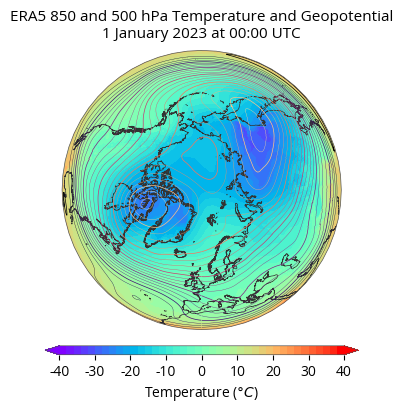

In [11]:
import cartopy.crs as ccrs

earthkit.maps.schema.figsize = (4, 4)

crs = ccrs.NearsidePerspective(central_latitude=90, central_longitude=0)
chart = earthkit.maps.Superplot(crs=crs)

chart.plot(temperature, style=temperature_style, transform_first=False)
chart.plot(geopotential, transform_first=False, style=geopotential_style)

chart.coastlines(resolution="high")

chart.legend(location="bottom")

# For the title, we can take advantage of earthkit-maps metadata
# detection, which allows us to use format keys like 'variable_name'
# and 'time', which are then populated from the metadata of the data
# that's been plotted.
chart.title(
    "ERA5 {level} hPa {name}\n"
    "{time:%-d %B %Y} at {time:%H:%M} UTC",
    fontsize=11,
)

chart.save("overview-detail.png")

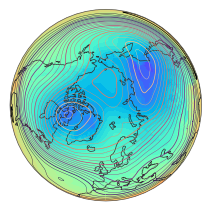

In [12]:
earthkit.maps.schema.figsize = (2, 2)
chart = earthkit.maps.Superplot(crs=crs)

chart.plot(temperature, style=temperature_style, transform_first=False)
chart.plot(geopotential, transform_first=False, style=geopotential_style)
chart.coastlines()

chart.save("overview.png")